# Load Data From Drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


4/1wGV2UEfriw-Jk1vh6OL8kAvm1efoohXqE4jOrgqcRJ3yJ65mnqNop4

# Libraries


In [2]:
!pip install -U yellowbrick


     |████████████████████████████████| 266kB 3.4MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets

from sklearn.manifold import TSNE

from yellowbrick.cluster import KElbowVisualizer

from gensim.models import word2vec, Word2Vec
from gensim.models import Doc2Vec
from gensim.models.word2vec import Text8Corpus

from nltk.cluster import KMeansClusterer
import nltk

from bokeh.plotting import ColumnDataSource

from scipy import sparse as sp

import datetime

import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import multiprocessing
import itertools
import string
import re
import sys
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#run before

In [ ]:
dataAll = pd.DataFrame(columns=['stopword'])
for month in range(4,9):
  for date in range(1,30,5):
    datebeingrun = '{}_{}_16'.format(month,date)
    isfile = os.path.isfile("/content/drive/My Drive/tweetsbydates/tweet{}.csv".format(datebeingrun))
    if(isfile == False): continue

    #print(datebeingrun)
    data= pd.read_csv("/content/drive/My Drive/tweetsbydates/tweet{}.csv".format(datebeingrun))
    #print(data.shape)
    dataAll = pd.concat([dataAll,data])
print(dataAll.shape)

(246975, 3)


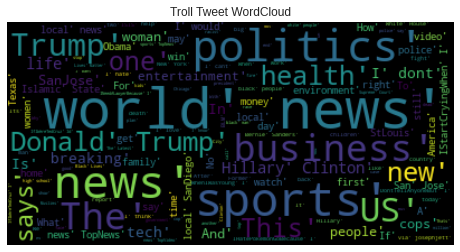

In [ ]:
text = dataAll['stopword']
wordcloud = WordCloud().generate(''.join(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Troll Tweet WordCloud")
plt.savefig('/content/drive/My Drive/WordCloud/WholeWord2VecWordcloud.png'.format(datebeingrun))
plt.show()


#other

In [8]:
datebeingrun = '4_16_16'
dataNew = pd.read_csv("/content/drive/My Drive/tweetsbydates/tweet{}.csv".format(datebeingrun))

dafwf = '8_26_16'
dataTwo = pd.read_csv("/content/drive/My Drive/tweetsbydates/tweet{}.csv".format(dafwf))

print(dataNew.shape)
print(dataTwo.shape)

dataNew['publish_date'] = pd.to_datetime(dataNew.publish_date)
dataTwo['publish_date'] = pd.to_datetime(dataTwo.publish_date)

dataNew = dataNew.sort_values(by=['publish_date'])
dataTwo = dataTwo.sort_values(by=['publish_date'])


print(dataNew['publish_date'].min())
print(dataTwo['publish_date'].max())

dateMN = dataNew['publish_date'].min()
dateMX = dataTwo['publish_date'].max()

(9112, 3)
(7126, 3)
2016-04-16 00:02:00
2016-08-30 23:59:00


# Preprocessing

In [9]:
hillarytweet = pd.read_csv('/content/drive/My Drive/politicalfiguretweets/hillarytweets.csv')
trumptweet = pd.read_csv('/content/drive/My Drive/politicalfiguretweets/trumptweets.csv')

hillarytweet['time'] =pd.to_datetime(hillarytweet.time)
trumptweet['time'] =pd.to_datetime(trumptweet.time)

datestart = dateMN.to_pydatetime() - datetime.timedelta(2)
dateend = dateMX.to_pydatetime()

hillaryrangetweets = hillarytweet.loc[(hillarytweet['time'] > datestart) & (hillarytweet['time'] < dateend),['time','stopword']]
trumprangetweets = trumptweet.loc[(trumptweet['time'] > datestart) & (trumptweet['time'] < dateend),['time','stopword']]


In [10]:
print(hillaryrangetweets.shape)
print(trumprangetweets.shape)

(2515, 2)
(1451, 2)


# Word Embeddings


In [ ]:
list_tweets = dataAll['stopword'].tolist()
import ast
for i in range(len(list_tweets)):
    list_tweets[i] = ast.literal_eval(list_tweets[i])

print(len(list_tweets))

w2vmodel = Word2Vec(list_tweets, min_count=2,
                      window=2, 
                      size=300,
                      sample=1e-5,
                      alpha=0.03,
                      min_alpha=0.0007,
                      negative=20,
                      sg = 1)

data = w2vmodel[w2vmodel.wv.vocab]
print(len(w2vmodel.wv.vocab))



246975
57175


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [ ]:
print('trump' in w2vmodel.wv.vocab)

True


In [ ]:
data = w2vmodel[w2vmodel.wv.vocab]
print(data)

[[-0.06721602  0.06925713 -0.22498502 ...  0.01114745 -0.1776086
   0.02927505]
 [-0.06529132  0.07698743 -0.22945628 ...  0.00815729 -0.18533713
   0.02797211]
 [-0.06561154  0.07355379 -0.22951885 ...  0.00651962 -0.18676446
   0.03125084]
 ...
 [-0.05518786  0.06368157 -0.2003002  ...  0.00535648 -0.16158077
   0.02703479]
 [-0.05076543  0.05810903 -0.1854113  ...  0.00546354 -0.14773305
   0.02402956]
 [-0.06054018  0.06831726 -0.21359259 ...  0.00639032 -0.17234895
   0.02775908]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
vocab = []
for i in w2vmodel.wv.most_similar('America'):
  vocab.append(i[0])
print(vocab)
print('happened' in vocab)

['happened', 'Thats', 'anyone', 'happens', 'care', 'stupid', 'So', 'NeverHillary', 'seeing', 'GrowingUpWithObama']
True


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
w2vmodel.similarity('AI', 'human') 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.999738

# Clustering


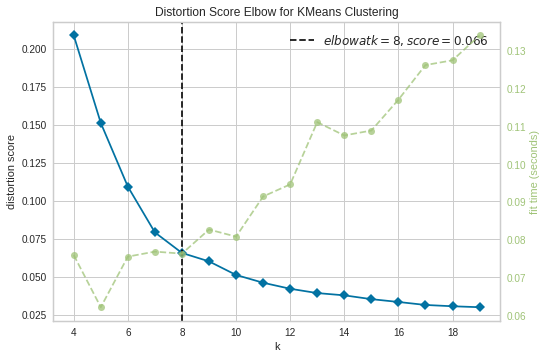

In [ ]:
model = KMeans()
elbow_visualizer = KElbowVisualizer(model, k=(4,20))

elbow_visualizer.fit(data)
elbow_visualizer.show()


In [ ]:
bestk = 8
km_model = KMeans(n_clusters=bestk,n_jobs=-1,random_state=91898)
km_model.fit(data)
y_kmeans = km_model.fit_predict(data)
#print(y_kmeans)

#print(dataden)
#print(km_model.labels_)

data2D = PCA(n_components=2).fit_transform(data)

In [ ]:
metrics.silhouette_score(data2D,km_model.labels_,metric='euclidean')

0.519794

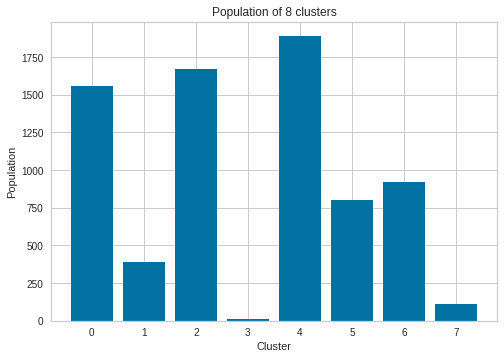

In [ ]:
plt.bar(range(len(set(km_model.labels_))), np.bincount(km_model.labels_))

plt.title("Population of {} clusters".format(bestk))
plt.ylabel('Population')
plt.xlabel('Cluster')
plt.savefig('/content/drive/My Drive/savedfigure/Cluster{}Word2VecPopulation.png'.format(datebeingrun))

#word cloud


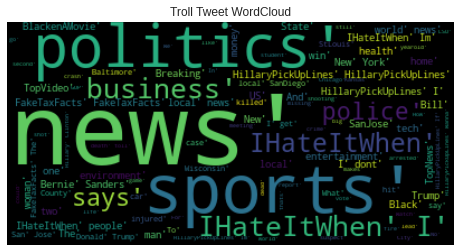

In [ ]:
text = dataNew['stopword']
wordcloud = WordCloud().generate(''.join(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Troll Tweet WordCloud")
plt.savefig('/content/drive/My Drive/savedfigure/Cluster{}Word2VecWordcloud.png'.format(datebeingrun))
plt.show()


In [ ]:
wordcloudTrump = WordCloud().generate(''.join(trumprangetweets['stopword']))
wordcloudHillary = WordCloud().generate(''.join(hillaryrangetweets['stopword']))

trumpinVec = []
hillaryinVec = []

for i in wordcloudTrump.words_.keys():
  tmp = i.replace("\'","")
  if tmp in w2vmodel.wv.vocab:
    trumpinVec.append(tmp)

print(trumpinVec)

for i in wordcloudHillary.words_.keys():
  tmp = i.replace("\'","")
  if tmp in w2vmodel.wv.vocab:
    hillaryinVec.append(tmp)

print(hillaryinVec)



['Trump', 'I', 'MakeAmericaGreatAgain', 'Thank', 'realDonaldTrump', 'NYPrimary', 'great', 'Hillary', 'Will', 'win', 'pm', 'would', 'Big', 'Syracuse', 'country', 'Indiana', 'never', 'ahead', 'FoxNews', 'Pennsylvania', 'State', 'Colorado', 'one', 'Join', 'back', 'get', 'votes', 'millions', 'Buffalo', 'A', 'Watch', 'tonight', 'race', 'voters', 'take', 'vote', 'Pittsburgh', 'New', 'We', 'love', 'Donald', 'actually', 'like', 'voted', 'Everyone', 'AM', 'Republican', 'morning', 'NY', 'crowd', 'needed', 'Clinton', 'See', 'TrumpTrain', 'California', 'fun', 'beat', 'system', 'delegates', 'cant', 'run', 'soon', 'polls', 'help', 'speech', 'video', 'discussing', 'last', 'night', 'Everybody', 'CNN', 'thing', 'nice', 'Biggest', 'story', 'politics', 'happening', 'million', 'people', 'voting', 'The', 'rules', 'DID', 'shortly', 'June', 'knew', 'protest', 'march', 'Friday', 'Dont', 'let', 'Saturday', 'weekend', 'Bubble', 'family', 'someone', 'cares', 'us', 'WSJ', 'third', 'world', 'talk', 'following', 's

#graph

In [ ]:
#Colors
color_names = []
for name, hex in matplotlib.colors.cnames.items():
    color_names.append(name)

color_names = ['red', 'yellow', 'green', 'cyan', 'blue', 'magenta','orange','brown','purple','gold','lime','indigo','tan',]


(7353, 2)


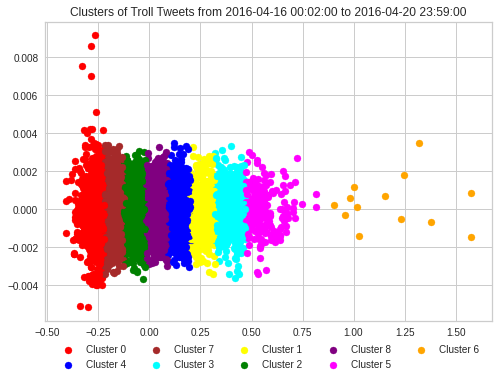

In [ ]:
fig, ax = plt.subplots()
color_map = []

label_set = []
print(data2D.shape)

for index, instance in enumerate(data2D):
      # print instance, index, labels[index]
      pca_comp_1 = np.asarray(data2D[index])[0]
      pca_comp_2 = np.asarray(data2D[index])[1] 
      if(y_kmeans[index] in label_set):
        ax.scatter(pca_comp_1, pca_comp_2, c=color_names[y_kmeans[index]])
      else:
        ax.scatter(pca_comp_1, pca_comp_2, c=color_names[y_kmeans[index]],label="Cluster {}".format(y_kmeans[index]))
        label_set.append(y_kmeans[index])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.title('Clusters of Troll Tweets from {} to {}'.format(dateMN,dateMX))
plt.savefig('/content/drive/My Drive/savedfigure/Cluster{}Word2VecFigWithOutTweets.png'.format(datebeingrun))
plt.show()